# Movie Recommendation System

## 1.Khai báo thư viện và làm sạch dữ liệu

In [1]:
# Khai báo các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu từ file csv
data = pd.read_csv('imdb_top_1000_movies.csv')

In [3]:
data.shape

(1000, 17)

### 1.1 Dataset: Gồm có 1000 dòng và 17 cột

* link_imdb: Link dẫn đến page của phim trên imdb
* link_poster : link dẫn đến ảnh poster của phim
* title: Tên của bộ phim
* year: Năm phát hành
* certificate: Chứng nhận phim nhận được
* runtime: Tổng thời lượng phim (phút)
* genre: Thể loại phim 
* rating: Điểm đánh giá phim tại imdb
* meta_score: điểm đánh giá phim nhận được
* overview: Tổng quan phim
* director: Tên đạo diễn 
* star_1, star_2, star_3, star_4: Tên các diễn viên chính
* votes: Tổng số lượt đánh giá của phim
* gross: Tổng doanh thu của phim (triệu đô)

In [4]:
data.head()

,link_imdb,link_poster,title,year,certificate,runtime,genre,rating,meta_score,overview,director,star_1,star_2,star_3,star_4,vote,gross
0,https://www.imdb.com/title/tt0111161/,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,677,521",$28.34M
1,https://www.imdb.com/title/tt0068646/,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,856,101",$134.97M
2,https://www.imdb.com/title/tt0468569/,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,(2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,650,837",$534.86M
3,https://www.imdb.com/title/tt0167260/,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,(2003),PG-13,201 min,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,845,151",$377.85M
4,https://www.imdb.com/title/tt0108052/,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,(1993),R,195 min,"Biography, Drama, History",9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,355,192",$96.90M


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   link_imdb    1000 non-null   object 
 1   link_poster  1000 non-null   object 
 2   title        1000 non-null   object 
 3   year         1000 non-null   object 
 4   certificate  984 non-null    object 
 5   runtime      1000 non-null   object 
 6   genre        1000 non-null   object 
 7   rating       1000 non-null   float64
 8   meta_score   782 non-null    float64
 9   overview     1000 non-null   object 
 10  director     1000 non-null   object 
 11  star_1       1000 non-null   object 
 12  star_2       1000 non-null   object 
 13  star_3       1000 non-null   object 
 14  star_4       1000 non-null   object 
 15  vote         1000 non-null   object 
 16  gross        812 non-null    object 
dtypes: float64(2), object(15)
memory usage: 132.9+ KB


### 1.2 Làm sạch dữ liệu

In [6]:
data.isna().sum()

link_imdb        0
link_poster      0
title            0
year             0
certificate     16
runtime          0
genre            0
rating           0
meta_score     218
overview         0
director         0
star_1           0
star_2           0
star_3           0
star_4           0
vote             0
gross          188
dtype: int64

In [7]:
data['certificate'].fillna('', inplace = True)

In [8]:
data['meta_score'].fillna(data['meta_score'].mean(), inplace = True)

In [9]:
data['gross'] = data['gross'].apply(lambda x: float(str(x).lstrip('$').rstrip('M')) if x is not None else x)
data['gross'].fillna(data['gross'].mean(), inplace = True)

In [10]:
data['year'] = data['year'].apply(lambda x: str(x).replace('(', '').replace(')', ''))

In [11]:
data['year'] = data['year'].apply(lambda x: int(x[-4:]) if len(x) > 4 else int(x))

In [12]:
data['year']

0      1994
1      1972
2      2008
3      2003
4      1993
       ... 
995    1954
996    1953
997    1937
998    1935
999    1933
Name: year, Length: 1000, dtype: int64

In [13]:
data['vote'] = data['vote'].apply(lambda x: int(str(x).replace(',','')))

## 2.Phân tích bộ dữ liệu:

In [14]:
data.describe()

,year,rating,meta_score,vote,gross
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,1991.424000,7.968200,80.740409,3.080789e+05,69.250899
std,24.067311,0.277247,8.684799,3.726582e+05,101.409413
min,1920.000000,7.600000,61.000000,2.556900e+04,0.000000
25%,1975.000000,7.800000,75.000000,5.912975e+04,5.010000
50%,1999.000000,7.900000,80.740409,1.514315e+05,44.865000
75%,2010.000000,8.100000,86.000000,4.269145e+05,69.250899
max,2022.000000,9.300000,100.000000,2.677521e+06,936.660000


<AxesSubplot:xlabel='certificate', ylabel='count'>

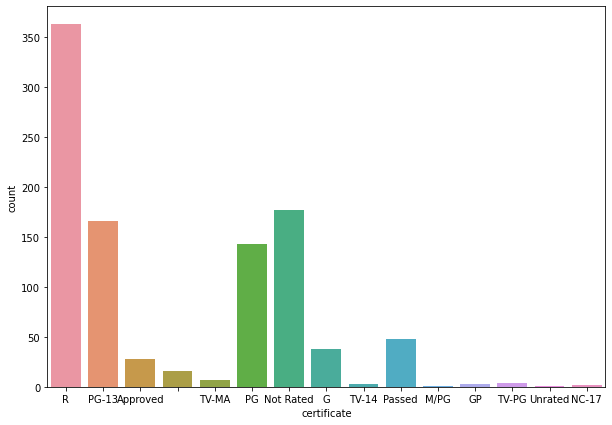

In [15]:
# Số lượng các chứng chỉ phim theo từng loại
plt.figure(figsize = (10, 7))
sns.countplot(x=data['certificate'])

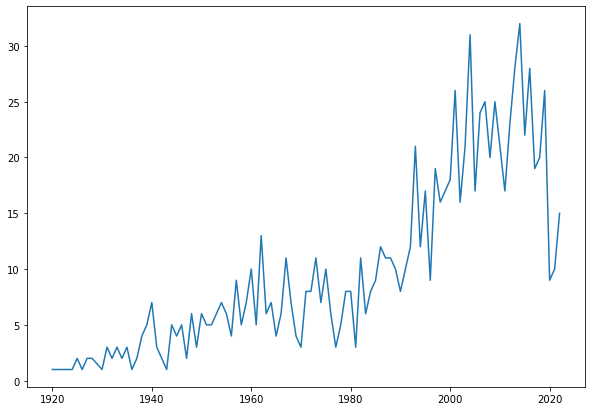

In [16]:
# Số lượng phim qua các năm 
plt.figure(figsize = (10, 7))
x = sorted(data['year'].drop_duplicates())
plt.plot(x , data['year'].value_counts()[x])

<AxesSubplot:xlabel='gross', ylabel='Density'>

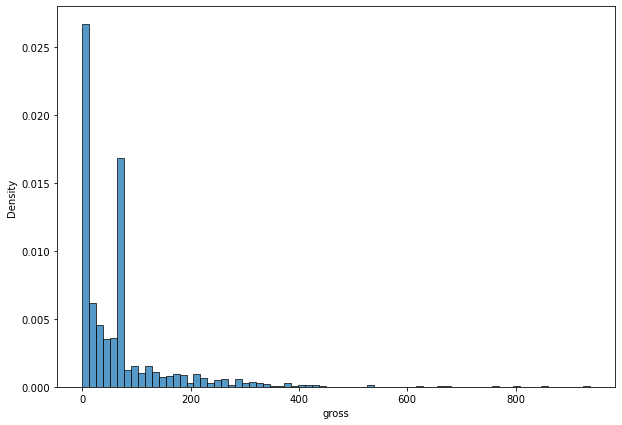

In [17]:
plt.figure(figsize = (10, 7))
sns.histplot(data['gross'], stat='density')

<AxesSubplot:xlabel='vote', ylabel='Density'>

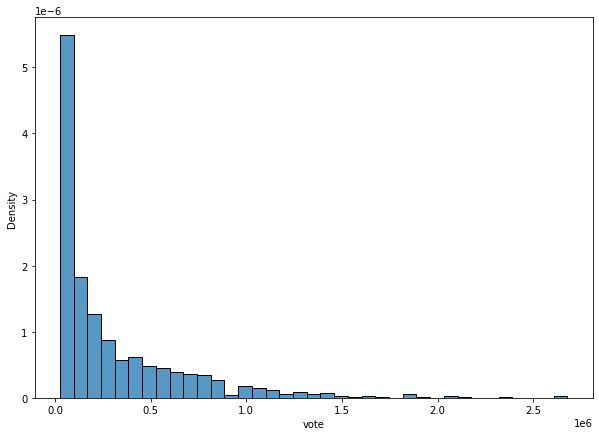

In [18]:
plt.figure(figsize = (10, 7))
sns.histplot(data['vote'], stat='density')

<AxesSubplot:xlabel='meta_score', ylabel='Density'>

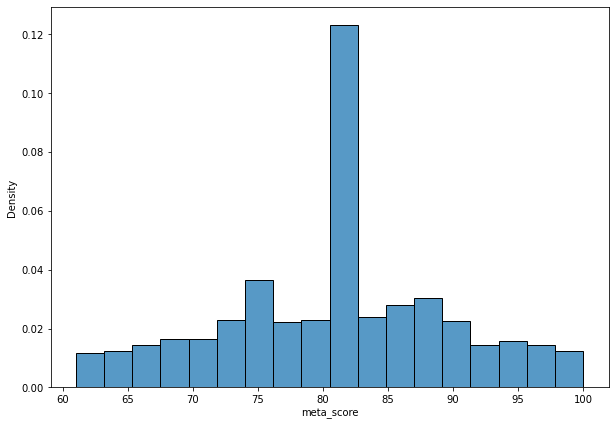

In [19]:
plt.figure(figsize = (10, 7))
sns.histplot(data['meta_score'], stat='density')

## 2. Thuật toán đề xuất:

### 2.1 Đề xuất đơn giản :

Đây là đề xuất mang tính chung cho tất cả mọi người, dựa trên kết quả đánh giá điểm số (cụ thể ở đây là điểm rating). Kết quả trả về là những bộ phim có điểm số cao nhất.

In [11]:
# top 10 phim có điểm rating cao nhất 
index = data['rating'][:10].index
data.iloc[index]

,link_imdb,link_poster,title,year,certificate,runtime,genre,rating,meta_score,overview,director,star_1,star_2,star_3,star_4,vote,gross
0,https://www.imdb.com/title/tt0111161/,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,R,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,677,521",28.34
1,https://www.imdb.com/title/tt0068646/,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,856,101",134.97
2,https://www.imdb.com/title/tt0468569/,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,650,837",534.86
3,https://www.imdb.com/title/tt0167260/,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,PG-13,201 min,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,845,151",377.85
4,https://www.imdb.com/title/tt0108052/,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,R,195 min,"Biography, Drama, History",9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,355,192",96.90
5,https://www.imdb.com/title/tt0071562/,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather Part II,1974,R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"1,270,642",57.30
6,https://www.imdb.com/title/tt0050083/,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,Approved,96 min,"Crime, Drama",9.0,96.0,The jury in a New York City murder trial is fr...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"790,982",4.36
7,https://www.imdb.com/title/tt7466810/,https://m.media-amazon.com/images/M/MV5BMDhhMj...,777 Charlie,2022,,164 min,"Adventure, Comedy, Drama",8.9,0.0,Dharma is stuck in a rut with his negative and...,Kiranraj K,Rakshit Shetty,Charlie,Sangeetha Sringeri,Raj B. Shetty,"31,912",0.00
8,https://www.imdb.com/title/tt0110912/,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,R,154 min,"Crime, Drama",8.9,94.0,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,"2,053,058",107.93
9,https://www.imdb.com/title/tt9263550/,https://m.media-amazon.com/images/M/MV5BNTk2Mj...,Rocketry: The Nambi Effect,2022,,157 min,"Biography, Drama",8.8,0.0,Based on the life of Indian Space Research Org...,Madhavan,Madhavan,Simran,Rajit Kapoor,Ravi Raghavendra,"50,754",0.00


### 2.2 Các phương pháp chính

Có hai phương pháp chính: 
* Đề xuất dựa trên nội dung (Content Based Filtering): Gợi ý các item dựa vào hồ sơ (profiles) của người dùng hoặc dựa vào nội dung/thuộc tính (attributes) của những item tương tự như item mà người dùng đã chọn trong quá khứ
* Đề xuất dựa trên sự tương quan (Collaborative Filtering): Gợi ý các items dựa trên sự tương quan (similarity) giữa các users và/hoặc items. Có thể hiểu rằng đây là cách gợi ý tới một user dựa trên những users có hành vi tương tự.
![](https://www.researchgate.net/profile/Lionel-Tondji/publication/323726564/figure/fig5/AS:631605009846299@1527597777415/Content-based-filtering-vs-Collaborative-filtering-Source.png)
Chi tiết các thuật toán: 
* https://viblo.asia/p/tim-hieu-ve-content-based-filtering-phuong-phap-goi-y-dua-theo-noi-dung-phan-1-V3m5WGBg5O7
* https://machinelearningcoban.com/2017/05/17/contentbasedrecommendersys/

### 2.3 Đề xuất dựa trên nội dung (Content Based Filtering)


Trong các hệ thống content-based, chúng ta cần xây dựng một bộ hồ sơ (profile) cho mỗi item. 
Profile này được biểu diễn dưới dạng toán học là một "feature vector" n chiều. Trong những trường hợp đơn giản, feature vector được trực tiếp trích xuất từ item. 
Từ đó chúng ta có thể xác định các item có nội dung tương tự bằng cách tính độ tương đồng giữa các feature vector của chúng.

Một số phương pháp thường được sử dụng để xây dựng feature vector là:
* Sử dụng TF-IDF
* Sử dụng biểu diễn nhị phân

Trong bài này, chúng ta sẽ sử dụng TF-IDF vector.

**TF (Term Frequency)** là tần suất tương đối của một từ trong tài liệu và được cho dưới dạng (số trường hợp thuật ngữ/số trường hợp tổng số).

**TF(t, d) = (số lần từ t xuất hiện trong văn bản d)/(tổng số từ trong văn bản d)**.

**IDF (Inverse Document Frequency)** hay nghịch đảo tần suất tài liệu dùng để ước lượng mức độ quan trọng của từ đó như thế nào. Khi tính tần số xuất hiện tf thì các từ đều được coi là quan trọng như nhau. Tuy nhiên có một số từ thường được được sử dụng nhiều nhưng không quan trọng để thể hiện ý nghĩa của đoạn văn.Điều này được thực hiện để giảm tầm quan trọng của các từ này trong việc tính toán điểm tương đồng cuối cùng.

**IDF(t, D) = log_e( Tổng số văn bản trong tập mẫu D/ Số văn bản có chứa từ t)**.

Tầm quan trọng tổng thể của mỗi từ đối với các tài liệu mà chúng xuất hiện bằng **TF * IDF**

Bài viết chi tiết, ví dụ về TF-IDF và Consine Similarity: https://thanhvie.com/tf-idf-va-cosine-similarity/

### 2.3.1 Đề xuất dựa trên độ giống nhau giữa các phần 'Overview'

Ta sẽ đi tìm những bộ phim có nội dung phần overview tương tự nhau:

**Sử dụng Class TfIdfVectorizer tạo ra ma trận TF - IDF:**

In [12]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Định nghĩa đối tượng TF-IDF Vectorizer. Loại bỏ các từ không quan trọng như 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# Xây dựng ma trận TF-IDF 
tfidf_matrix = tfidf.fit_transform(data['overview'])

# Output kích cỡ của tfidf_matrix
tfidf_matrix.shape

(1000, 5590)

Có thể hiểu rằng chúng ta có 5590 từ khác nhau trong cột 'overview' để mô tả cho 1000 bộ phim trong bộ dữ liệu của chúng ta. Và ý tưởng là chúng ta sẽ đi tính độ tương tự của những 'overview' này. Một phương pháp để tính độ tương tự đó là cosine.

Tiếp theo, ta sử dụng độ tương tự cosine để tính toán một đại lượng số biểu thị sự giống nhau giữa hai phim. Chọn độ tương tự cosine vì nó không phụ thuộc vào độ lớn và tương đối dễ dàng để tính toán (đặc biệt khi được sử dụng kết hợp với điểm TF - IDF). 

Cosine của hai vectơ khác 0 có thể được suy ra bằng cách sử dụng công thức tích Euclide :

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/fb9fc371e46e02d0ef51e781e7397629425856b5)

Cho trước hai vectơ thuộc tính, A và B, độ tương tự cosin, cos(θ) , được biểu diễn bằng tích vô hướng và độ lớn như:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/0a4c9a778656537624a3303e646559a429868863)

**Chúng ta sử dụng module linear_kernel() của sklearn thay vì cosine_similities() tốc độ xử lý của linear_kernal nhanh hơn.**

In [13]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# tính toán cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Hàm đề xuất của chúng ta sẽ nhận giá trị đầu vào là tên của một bộ phim và đầu ra là top 10 bộ phim có giá trị cosine cao nhất (ngoại trừ chính bộ phim ban đầu)

In [14]:
# Tạo một pd.series gồm index và tên phim 
indices = pd.Series(data.index, index= data['title'])

# Hàm đề xuất lấy tên phim là dữ liệu đầu vào và trả về những bộ phim tương tự
def get_recommendations(title, cosine_sim=cosine_sim):
    # lấy index của phim 
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]


In [15]:
# Top 10 bộ phim có nội dung tương tự với 'The Dark Knight Rises'.
get_recommendations('The Dark Knight Rises')

166                         Batman Begins
627                            The Batman
2                         The Dark Knight
388                       The Incredibles
362                                Ip Man
70                       Django Unchained
976             Die Hard with a Vengeance
305                          The Exorcist
718                The Outlaw Josey Wales
379    Tae Guk Gi: The Brotherhood of War
Name: title, dtype: object

In [16]:
# giá trị cosine của top 10 bộ phim tương tự với The Dark Knight Rises
index = indices['The Dark Knight Rises']
scores = list(enumerate(cosine_sim[index]))
scores = sorted(scores, key=lambda x: x[1], reverse=True)
scores = scores[1:11]
scores

[(166, 0.19347840777480374),
 (627, 0.183916561218386),
 (2, 0.17266122461747765),
 (388, 0.10052477550306413),
 (362, 0.08879559459538439),
 (70, 0.0887335381844912),
 (976, 0.08597262848053445),
 (305, 0.08570399833758),
 (718, 0.07564909714855801),
 (379, 0.07450757393021464)]

### 2.3.2 Đề xuất dựa trên thể loại phim, đạo diễn và các diễn viên 

Ta sẽ đi tìm những bộ phim có cùng đạo diễn, thể loại, cũng như các diễn viên với bộ phim cho trước.
Trước tiên ta cần gộp các nội dung cần thiết gồm: gerne, star và director thành một cột "feature" để tính ma trận TF-IDF.

In [17]:
data['feature'] = data['director'] + ' ' + data['genre'].apply(lambda a: str(a).replace(',', ' ')) + ' ' + data['star_1'] + ' ' + data['star_2'] + ' ' + data['star_3'] + ' ' + data['star_4'] 

In [18]:
data['feature'].head(5)

0    Frank Darabont Drama Tim Robbins Morgan Freema...
1    Francis Ford Coppola Crime  Drama Marlon Brand...
2    Christopher Nolan Action  Crime  Drama Christi...
3    Peter Jackson Action  Adventure  Drama Elijah ...
4    Steven Spielberg Biography  Drama  History Lia...
Name: feature, dtype: object

In [19]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Định nghĩa đối tượng TF-IDF Vectorizer. Loại bỏ các từ không quan trọng như 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# Xây dựng ma trận TF-IDF 
tfidf_matrix = tfidf.fit_transform(data['feature'])

# Output kích cỡ của tfidf_matrix
tfidf_matrix.shape

(1000, 4398)

In [20]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# tính toán cosine similarity matrix
cosine_sim_2 = linear_kernel(tfidf_matrix, tfidf_matrix)

In [21]:
 # Tạo một pd.series gồm index và tên phim 
indices = pd.Series(data.index, index= data['title'])

# Hàm đề xuất lấy tên phim là dữ liệu đầu vào và trả về những bộ phim tương tự
def get_recommendations(title, cosine_sim=cosine_sim_2):
    # lấy index của phim 
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]


In [22]:
# Top 10 bộ phim có nội dung tương tự với 'The Dark Knight Rises'.
get_recommendations('The Dark Knight Rises')

166             Batman Begins
23               Interstellar
2             The Dark Knight
41               The Prestige
605                   Dunkirk
47     Léon: The Professional
919               Dark Waters
82                    Memento
408                       JFK
650               The Fighter
Name: title, dtype: object

In [24]:
# giá trị cosine của top 10 bộ phim tương tự với The Dark Knight Rises
index = indices['The Dark Knight Rises']
scores = list(enumerate(cosine_sim_2[index]))
scores = sorted(scores, key=lambda x: x[1], reverse=True)
scores = scores[1:11]
scores

[(166, 0.37805679824685556),
 (23, 0.3615788254408408),
 (2, 0.3573918833038096),
 (41, 0.3480270101618977),
 (605, 0.32401679146970197),
 (47, 0.21681369676067558),
 (919, 0.21654994115119586),
 (82, 0.21595575016364066),
 (408, 0.20476591013788759),
 (650, 0.20215540258079984)]

## 3. Web đề xuất phim

### Link web

https://movies-recommendation-system-28.streamlit.app/?fbclid=IwAR2t-72IChskl8uQzY2ar3scxtHKyPonXbRJhLnoHMs6RFpABg6zHexaufE